epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326


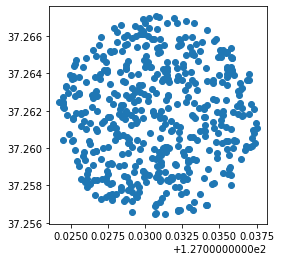

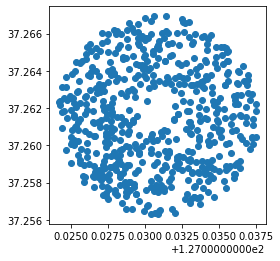

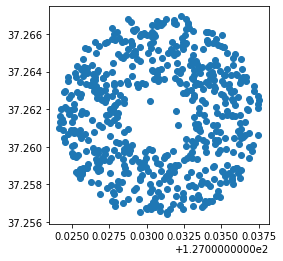

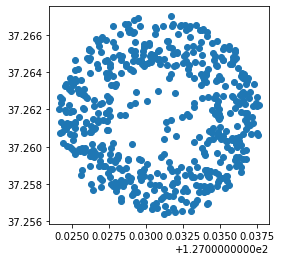

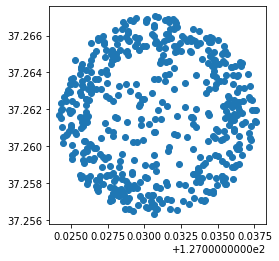

In [7]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
import random
import alphashape
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import pyproj
import folium

fire = (37.261672, 127.030887) # 300m radius

def haversine_distance(point, center):
	# latitude, longitude
	lat1, lon1, lat2, lon2 = map(radians, [point[0], point[1], center[0], center[1]])
	del_lat = lat1 - lat2
	del_lon = lon1 - lon2

	a = sin(del_lat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(del_lon / 2) **2
	c = 2 * asin(sqrt(a))
	r = 6371 # radius of earth in km
	return c * r * 1000 #return m

def get_data():
	d_list = []
	for i in range(0, 5):
		filename = "./data/time_random" + str(i) + ".csv"
		d = pd.read_csv(filename, usecols=['latitude', 'longitude']).values.tolist()
		if i > 0:
			for point in d:
				if haversine_distance(point, fire) <= i * 100:
					# if random.random() < 0.9:
					d.remove(point)
		# print(len(d))
		d_list.append(d)

	return d_list

def main():
	d_list = get_data()
	
	# print(d_list[0][1][1])
	for j in d_list:
		p = [Point(j[i][1], j[i][0]) for i in range(0, len(j))]
		gd = gpd.GeoDataFrame({'geometry':p}, crs=4326)
		print(gd.crs)
		gd.plot()

	# p = [Point(d_list[1][i][1], d_list[1][i][0]) for i in range(0, len(d_list[0]))]
	# gd = gpd.GeoDataFrame({'geometry':p}, crs=4326)
	# print(gd.crs)
	# gd.plot()
	return

if __name__ == "__main__":
	main()